In [44]:
# import necessary libraries
import numpy as np 
import pandas as pd

In [45]:
# load the dataset 
df = pd.read_csv('../data/loan.csv', low_memory=False)

In [46]:
# view the first few rows of the data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# check the descriptive statistics of the data
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


From the descrribe table, we can see that the 

# Data Cleaning and Preparation
We will start by exploring the target variable. The target variable in this case is the loan age measured in onths. The reason for this is to capture our objective which is to capture the average number of months it takes to fully payout loan, this in essence will give us loans that are likely to payout early and if they do payout early by how much do we expect that to happen. 

We start our analysis by first using the necessary variables to calcualate the number of months it takes to pay out loans. In this analysis we are not interested in defaulted, charged off and current loans as we will be training our model on loans that are closed and thus allow the model to predict unseen data during the loan origination. We check for missing values and drop or fillna where necessary, we will also be checking the correlation between the target variable and different features. We check for and handle outliers. 

Since we are interested in the loan age, we will be using issue date, last payment date, term, and loan status(since we interested in paid out loan) to calculate the target variable, hence, we start with these variables.

In [48]:
# explore the columns for target variable calculation
df[['issue_d', 'last_pymnt_d', 'loan_status', 'term']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   issue_d       object
 1   last_pymnt_d  object
 2   loan_status   object
 3   term          object
dtypes: object(4)
memory usage: 69.0+ MB


In [49]:
# check the data types
df[['issue_d', 'last_pymnt_d', 'loan_status', 'term']].dtypes

issue_d         object
last_pymnt_d    object
loan_status     object
term            object
dtype: object

From the results, the date columns are stored as objects meaning strings. These need to be converted to dates so that we can us it to calculate the loan age.

In [50]:
# change the date columns to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'])

df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])

C:\Users\Ikemma\AppData\Local\Temp\ipykernel_34400\3389958822.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'])
C:\Users\Ikemma\AppData\Local\Temp\ipykernel_34400\3389958822.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])


In [51]:
# view the date columns data types 
df[['issue_d', 'last_pymnt_d']].dtypes

issue_d         datetime64[ns]
last_pymnt_d    datetime64[ns]
dtype: object

In [52]:
# view the date columns to ensure the output are dates
df[['issue_d', 'last_pymnt_d']]

,issue_d,last_pymnt_d
0,2018-12-01,2019-02-01
1,2018-12-01,2019-02-01
2,2018-12-01,2019-02-01
3,2018-12-01,2019-02-01
4,2018-12-01,2019-02-01
...,...,...
2260663,2017-10-01,2019-02-01
2260664,2017-10-01,2018-08-01
2260665,2017-10-01,2019-02-01
2260666,2017-10-01,2019-02-01


In [53]:
# explore the loan status columns to know the category each belongs and determine how to calculate the target variable
counts = df['loan_status'].value_counts()
proportion = df['loan_status'].value_counts(normalize=True)
result = pd.concat([counts, proportion], axis=1)
result.columns = ['Count', 'Proportion']
result

,Count,Proportion
loan_status,,
Fully Paid,1041952,0.460904
Current,919695,0.406824
Charged Off,261655,0.115742
Late (31-120 days),21897,0.009686
In Grace Period,8952,0.003960
Late (16-30 days),3737,0.001653
Does not meet the credit policy. Status:Fully Paid,1988,0.000879
Does not meet the credit policy. Status:Charged Off,761,0.000337
Default,31,0.000014


From the results we can see that fully paid, current, charged off make up 90% of our data. In this case, we will check the histogram for this column. We will be making some calculations to engineer our target variable

In [54]:
# explore the term columns to understand the terms that each loan falls under
df['term'].value_counts(), df['term'].unique()

(term
 36 months    1609754
 60 months     650914
 Name: count, dtype: int64,
 array([' 36 months', ' 60 months'], dtype=object))

In [55]:
# convert to integer and remove the months
df['term_months'] = [int(s.split(' ')[1]) for s in df['term']]

In [56]:
# check for missing values
df[['issue_d', 'last_pymnt_d', 'loan_status', 'term']].isnull().sum()

issue_d            0
last_pymnt_d    2426
loan_status        0
term               0
dtype: int64

There are no missing values for most the target variable inputs. We filter the data and calculate the target variable and then check for missing values again, if there are missing values, it will be treated accordingly. 

In [57]:
# calculte the loan age in months which is our target variable
df['loan_age'] = (df['last_pymnt_d'] - df['issue_d']).dt.days / 30.44

In [58]:
# filter out rows based on loan status needed for analysis
df_PaidOut = df[df['loan_status'].isin(['Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)'])]

In [59]:
# view first 5 rows
df_PaidOut.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,term_months,loan_age
100,NaN,NaN,30000,30000,30000.0,36 months,22.35,1151.16,D,D5,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,36,1.018397
152,NaN,NaN,40000,40000,40000.0,60 months,16.14,975.71,C,C4,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,60,2.036794
170,NaN,NaN,20000,20000,20000.0,36 months,7.56,622.68,A,A3,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,36,2.036794
186,NaN,NaN,4500,4500,4500.0,36 months,11.31,147.99,B,B3,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,36,2.036794
215,NaN,NaN,8425,8425,8425.0,36 months,27.27,345.18,E,E5,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,36,2.036794


In [60]:
# chec shape
df_PaidOut.shape

(1067586, 147)

In [61]:
# define function to check for missing values
def missing_col(df):
    missing_col = df.isna().sum().sort_values(ascending=False)
    missing_col_df = pd.DataFrame(missing_col[missing_col > 0])
    print(missing_col_df.index.tolist())
    return missing_col_df   

In [62]:
# check for values
missing_col(df)

['id', 'member_id', 'url', 'orig_projected_additional_accrued_interest', 'hardship_dpd', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_loan_status', 'hardship_type', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'hardship_reason', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'sec_app_mths_since_last_major_derog', 'sec_app_revol_util', 'revol_bal_joint', 'sec_app_collections_12_mths_ex_med', 'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il', 'sec_app_open_acc', 'sec_app_mort_acc', 'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line', 'verification_status_joint', 'dti_joint', 'annual_inc_joint', 'desc', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'mths

,0
id,2260668
member_id,2260668
url,2260668
orig_projected_additional_accrued_interest,2252242
hardship_dpd,2250055
...,...
total_acc,29
delinq_amnt,29
acc_now_delinq,29
annual_inc,4


In [63]:
# define a variable to drop columns using mising columns and irrelevant columns after generating the target variable
cols_to_drop = ['id', 'url', 'member_id', 'orig_projected_additional_accrued_interest', 'hardship_length', 'hardship_reason', 'hardship_status', 'deferral_term', 
                      'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'hardship_dpd', 'hardship_loan_status', 'hardship_payoff_balance_amount', 
                      'hardship_last_payment_amount', 'hardship_type', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 
                      'settlement_percentage', 'settlement_term', 'sec_app_mths_since_last_major_derog', 'sec_app_revol_util', 'revol_bal_joint', 'sec_app_open_acc', 
                      'sec_app_earliest_cr_line', 'sec_app_collections_12_mths_ex_med', 'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il', 
                      'sec_app_mort_acc', 'sec_app_inq_last_6mths', 'desc', 'mths_since_last_record', 
                      'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'mths_since_last_delinq', 'il_util', 
                      'mths_since_rcnt_il', 'all_util', 'open_acc_6m', 'inq_last_12m', 'total_cu_tl', 'total_bal_il', 'open_rv_12m', 'inq_fi', 'max_bal_bc', 
                      'open_rv_24m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_recent_inq', 'num_tl_120dpd_2m', 'mo_sin_old_il_acct', 
                      'bc_util', 'percent_bc_gt_75', 'bc_open_to_buy', 'mths_since_recent_bc', 'pct_tl_nvr_dlq', 'avg_cur_bal', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 
                      'num_rev_accts', 'num_bc_tl', 'num_actv_bc_tl', 'num_accts_ever_120_pd', 'mo_sin_rcnt_tl', 'num_il_tl', 'num_op_rev_tl', 'tot_coll_amt', 
                      'num_rev_tl_bal_gt_0', 'total_rev_hi_lim', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'tot_hi_cred_lim', 
                      'total_il_high_credit_limit', 'num_actv_rev_tl', 'num_bc_sats', 'num_sats', 'total_bal_ex_mort', 'total_bc_limit', 'mort_acc', 'acc_open_past_24mths', 
                      'title', 'revol_util', 'dti', 'pub_rec_bankruptcies', 'collections_12_mths_ex_med', 'tax_liens', 'last_credit_pull_d', 'inq_last_6mths', 
                      'earliest_cr_line', 'delinq_2yrs', 'zip_code', 'last_pymnt_d', 'issue_d', 'term', 'loan_status', 'addr_state', 'initial_list_status', 
                      'chargeoff_within_12_mths', 'delinq_amnt', 'hardship_flag', 'payment_plan_start_date', 'debt_settlement_flag', 'verification_status_joint', 'dti_joint', 
                      'annual_inc_joint', 'emp_title', 'emp_length', 'tot_cur_bal', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
                      'recoveries', 'collection_recovery_fee', 'policy_code', 'disbursement_method', 'term_months', 'application_type']

In [64]:
# drop columns
df_PaidOut.drop(columns=cols_to_drop, inplace=True)

C:\Users\Ikemma\AppData\Local\Temp\ipykernel_34400\3571096346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PaidOut.drop(columns=cols_to_drop, inplace=True)


In [65]:
# view data columns
df_PaidOut.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'purpose', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'last_pymnt_amnt', 'acc_now_delinq', 'loan_age'],
      dtype='object')

In [66]:
df_PaidOut.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,purpose,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,acc_now_delinq,loan_age
100,30000,30000,30000.0,22.35,1151.16,D,D5,MORTGAGE,100000.0,Source Verified,...,debt_consolidation,11.0,1.0,15603,19.0,30026.442500,30026.44,30082.32,0.0,1.018397
152,40000,40000,40000.0,16.14,975.71,C,C4,MORTGAGE,45000.0,Verified,...,credit_card,18.0,0.0,34971,37.0,40856.678960,40856.68,40910.48,0.0,2.036794
170,20000,20000,20000.0,7.56,622.68,A,A3,MORTGAGE,100000.0,Not Verified,...,credit_card,9.0,0.0,25416,19.0,20215.792430,20215.79,20228.39,0.0,2.036794
186,4500,4500,4500.0,11.31,147.99,B,B3,RENT,38500.0,Not Verified,...,credit_card,12.0,0.0,4472,25.0,4549.217149,4549.22,4553.46,0.0,2.036794
215,8425,8425,8425.0,27.27,345.18,E,E5,MORTGAGE,450000.0,Verified,...,credit_card,21.0,0.0,36812,37.0,8735.148975,8735.15,8754.30,0.0,2.036794


In [67]:
# view unique counts for column value
for cols in df_PaidOut.columns:
    print(df_PaidOut[cols].value_counts())

loan_amnt
10000    80423
12000    58820
15000    56093
20000    55442
5000     39970
         ...  
39950        1
36275        1
39400        1
38775        1
38125        1
Name: count, Length: 1551, dtype: int64
funded_amnt
10000    80345
12000    58738
15000    55998
20000    55283
5000     39958
         ...  
39925        1
36725        1
38725        1
36350        1
38125        1
Name: count, Length: 1551, dtype: int64
funded_amnt_inv
10000.000000    74879
12000.000000    54039
15000.000000    50770
20000.000000    49208
5000.000000     38399
                ...  
24429.722921        1
24835.093347        1
24511.511461        1
22495.595952        1
38125.000000        1
Name: count, Length: 7722, dtype: int64
int_rate
10.99    32425
11.99    26833
5.32     25887
9.17     23255
7.89     22296
         ...  
17.44        1
21.82        1
24.59        1
14.88        1
14.67        1
Name: count, Length: 643, dtype: int64
installment
327.34     2629
301.15     2405
332.10     21

In [68]:
# statistical description 
df_PaidOut.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,acc_now_delinq,loan_age
count,1.067586e+06,1.067586e+06,1.067586e+06,1.067586e+06,1.067586e+06,1.067586e+06,1.067586e+06,1.067586e+06,1.067586e+06,1.067586e+06,1.067586e+06,1.067586e+06,1.067586e+06,1.067586e+06,1.067433e+06
mean,1.419545e+04,1.418685e+04,1.416521e+04,1.271365e+01,4.329533e+02,7.760585e+04,1.151571e+01,2.081762e-01,1.642204e+04,2.504046e+01,1.625773e+04,1.623155e+04,6.573298e+03,4.904523e-03,2.186353e+01
std,8.686228e+03,8.682210e+03,8.684538e+03,4.566000e+00,2.611575e+02,7.163496e+04,5.432350e+00,5.910606e-01,2.296918e+04,1.197303e+01,1.044143e+04,1.044145e+04,7.443956e+03,7.601201e-02,1.284345e+01
min,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.500000e+03,7.500000e+03,7.500000e+03,9.170000e+00,2.426300e+02,4.700000e+04,8.000000e+00,0.000000e+00,5.924000e+03,1.600000e+01,8.256692e+03,8.234170e+03,6.164000e+02,0.000000e+00,1.100526e+01
50%,1.200000e+04,1.200000e+04,1.200000e+04,1.229000e+01,3.698600e+02,6.500000e+04,1.100000e+01,0.000000e+00,1.113500e+04,2.300000e+01,1.365447e+04,1.362467e+04,3.994015e+03,0.000000e+00,2.102497e+01
75%,2.000000e+04,2.000000e+04,2.000000e+04,1.531000e+01,5.751200e+02,9.286752e+04,1.400000e+01,0.000000e+00,1.987900e+04,3.200000e+01,2.224922e+04,2.222163e+04,9.983170e+03,0.000000e+00,3.498686e+01
max,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.099920e+07,9.000000e+01,6.300000e+01,2.904836e+06,1.620000e+02,6.329688e+04,6.329688e+04,4.219205e+04,1.400000e+01,6.997372e+01


In [69]:
#check missing columns for new dataframe
missing_col(df_PaidOut)

['loan_age']


,0
loan_age,153


Target variable have missing values, this is minimal and we will be filling this with the mean number of months.

In [70]:
# verify missing values
df_PaidOut[df_PaidOut.isna().any(axis=1)]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,purpose,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,acc_now_delinq,loan_age
1777,20975,20975,20975.0,8.19,659.13,A,A4,MORTGAGE,165000.0,Verified,...,debt_consolidation,9.0,0.0,4210,21.0,0.0,0.0,0.0,0.0,NaN
3203,20000,20000,20000.0,11.80,662.38,B,B4,RENT,50000.0,Verified,...,vacation,17.0,0.0,16576,26.0,0.0,0.0,0.0,0.0,NaN
3677,9100,9100,9100.0,26.31,368.15,E,E4,OWN,62000.0,Verified,...,other,8.0,0.0,4165,23.0,0.0,0.0,0.0,0.0,NaN
4022,3525,3525,3525.0,25.34,140.79,E,E3,MORTGAGE,150000.0,Not Verified,...,debt_consolidation,12.0,0.0,8591,15.0,0.0,0.0,0.0,0.0,NaN
4768,11500,11500,11500.0,13.56,390.59,C,C1,RENT,33000.0,Not Verified,...,debt_consolidation,5.0,0.0,2600,12.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126829,10500,10500,10500.0,16.14,369.88,C,C4,OWN,300000.0,Not Verified,...,debt_consolidation,13.0,0.0,76267,19.0,0.0,0.0,0.0,0.0,NaN
126920,15000,15000,15000.0,18.94,549.39,D,D2,RENT,58000.0,Source Verified,...,debt_consolidation,9.0,0.0,9954,21.0,0.0,0.0,0.0,0.0,NaN
128334,19000,19000,19000.0,7.84,383.80,A,A4,RENT,95000.0,Not Verified,...,debt_consolidation,16.0,0.0,4720,18.0,0.0,0.0,0.0,0.0,NaN
131124,15000,15000,15000.0,16.14,528.40,C,C4,MORTGAGE,53000.0,Source Verified,...,credit_card,13.0,0.0,37033,32.0,0.0,0.0,0.0,0.0,NaN


this means that either the lat payment date or issue date was missing. in this case we will be imputing missing data

In [71]:
# fill missina values
df_PaidOut['loan_age'].fillna(df_PaidOut['loan_age'].mean(), inplace=True)

C:\Users\Ikemma\AppData\Local\Temp\ipykernel_34400\3808359899.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_PaidOut['loan_age'].fillna(df_PaidOut['loan_age'].mean(), inplace=True)
C:\Users\Ikemma\AppData\Local\Temp\ipykernel_34400\3808359899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PaidOut['loan_age'].fillna(df_PaidOut['

In [72]:
# check
df_PaidOut[df_PaidOut.isna().any(axis=1)]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,purpose,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,acc_now_delinq,loan_age


# EDA

<Axes: ylabel='Frequency'>

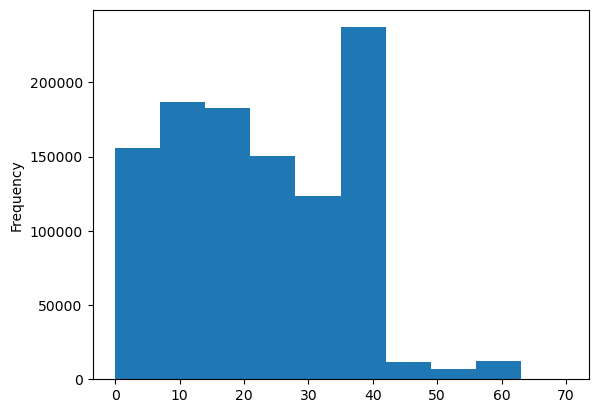

In [73]:
# check target variable distribution
df_PaidOut['loan_age'].plot.hist()

This is skewed.

In [74]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Ikemma\AppData\Local\Temp\ipykernel_34400\4282067649.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


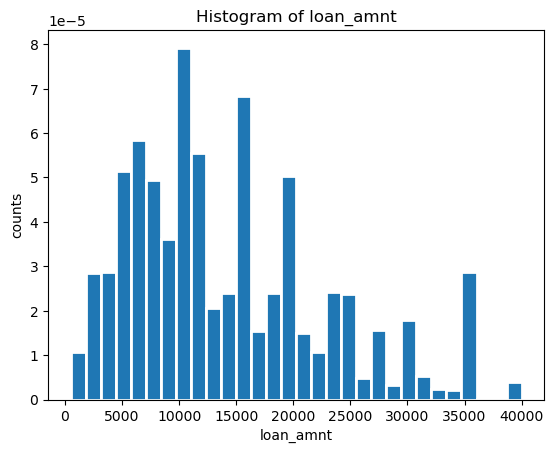

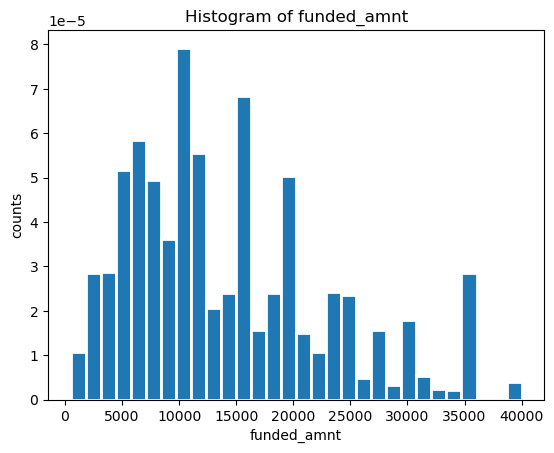

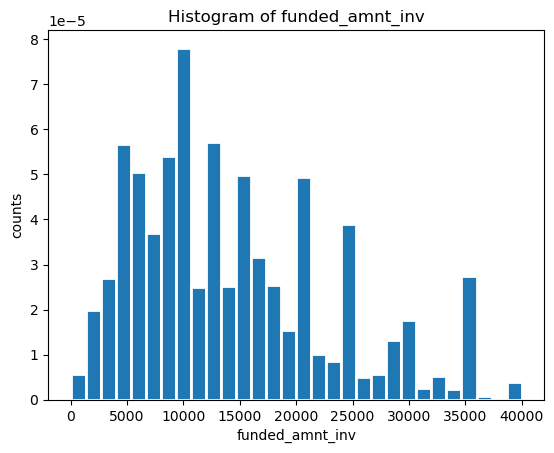

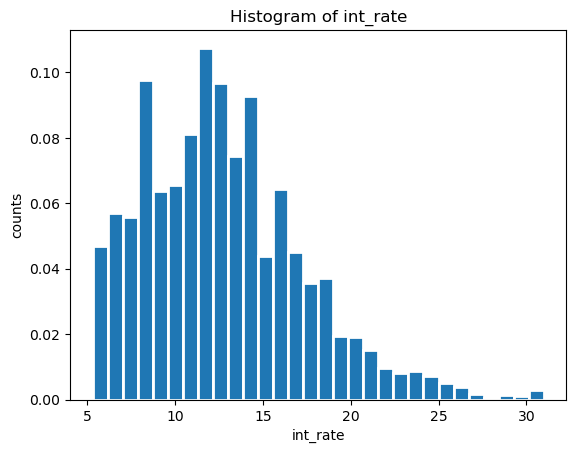

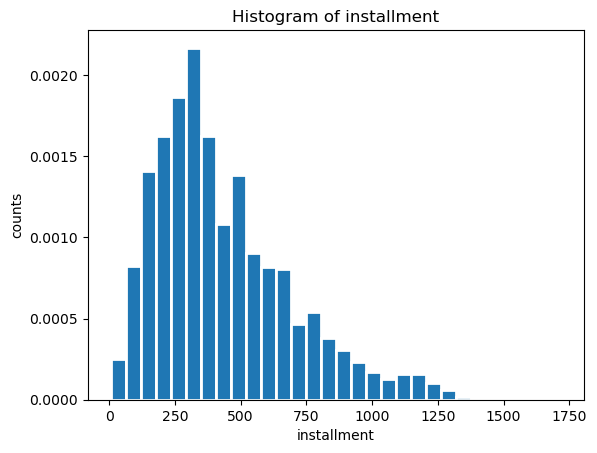

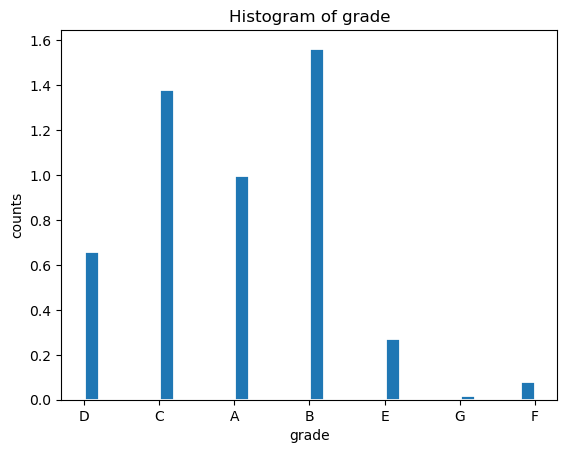

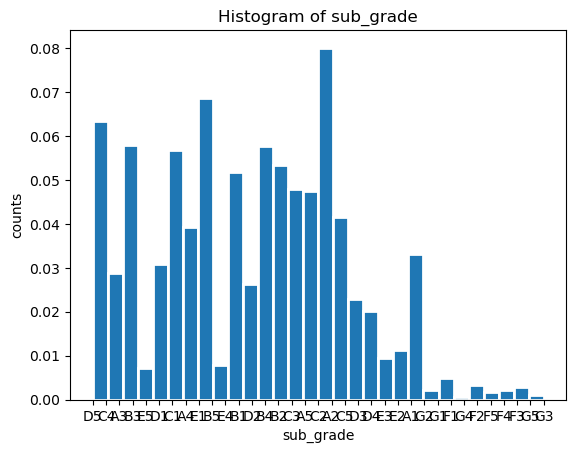

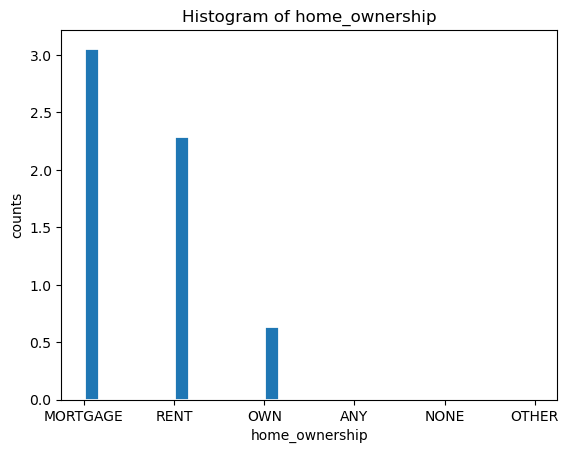

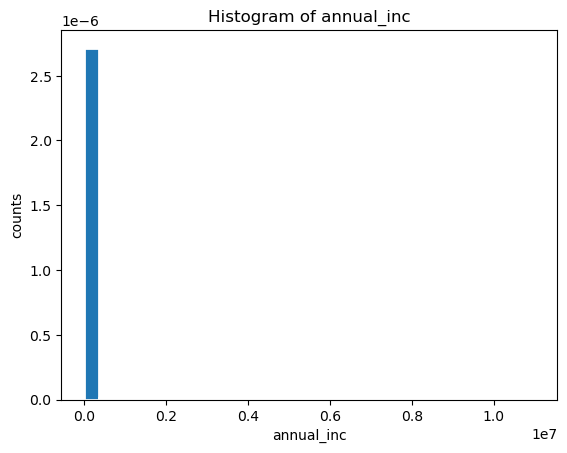

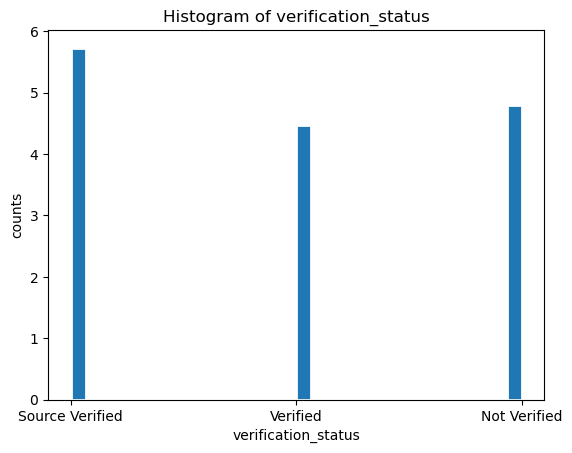

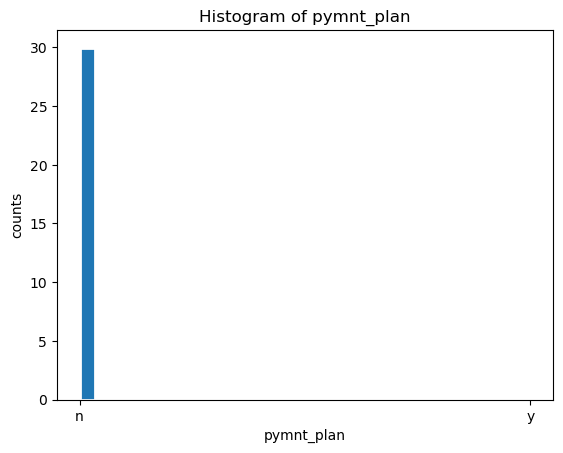

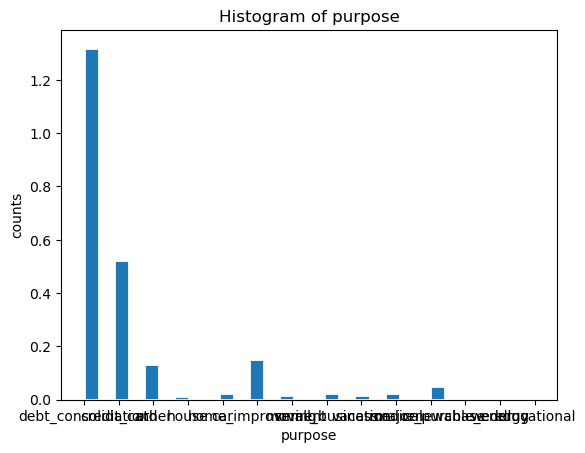

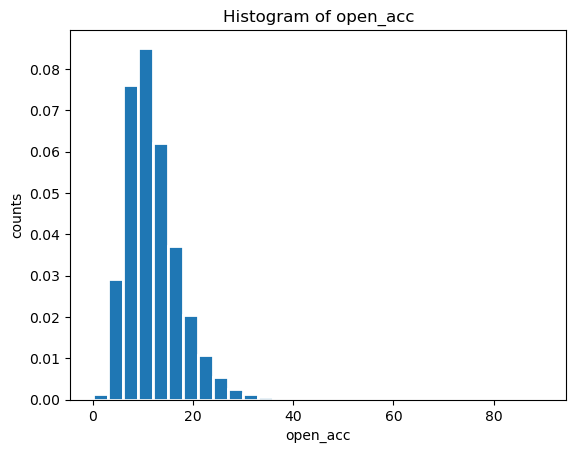

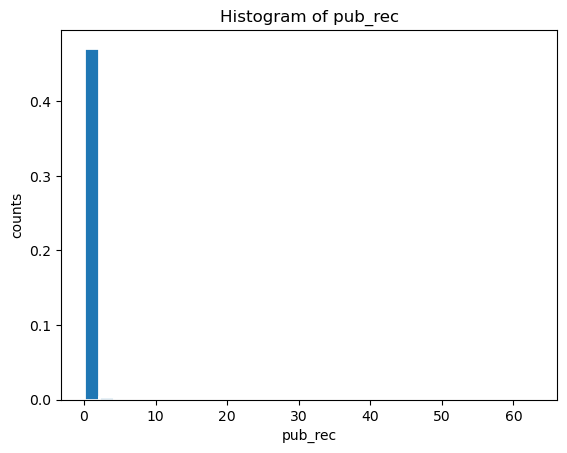

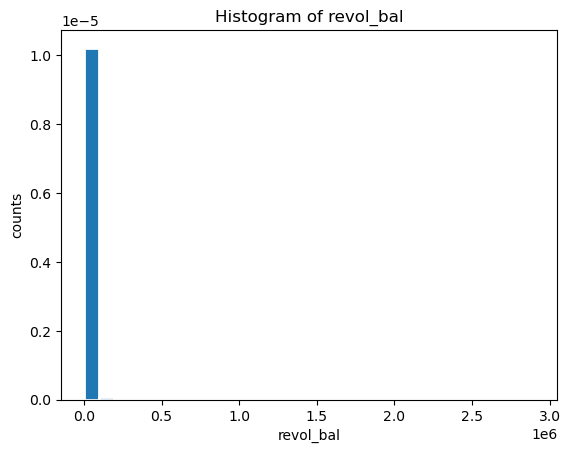

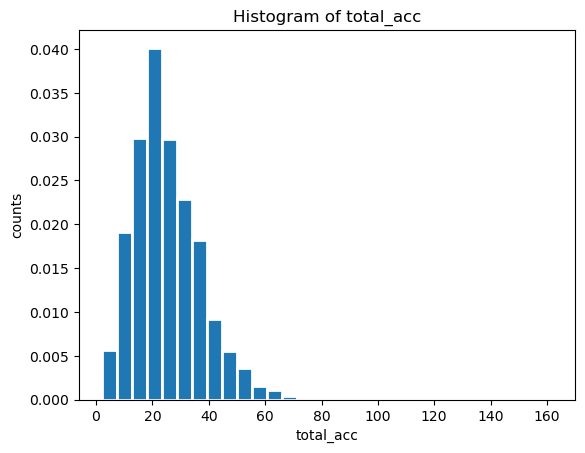

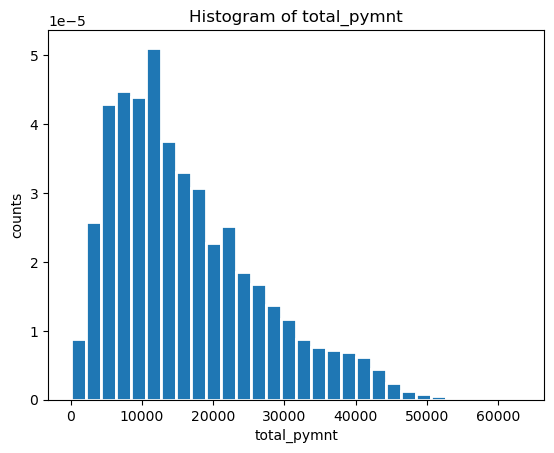

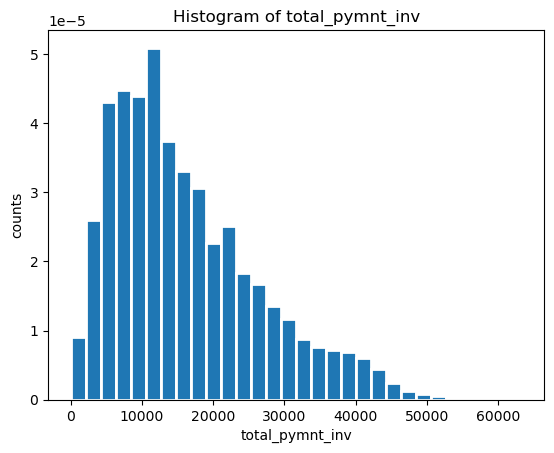

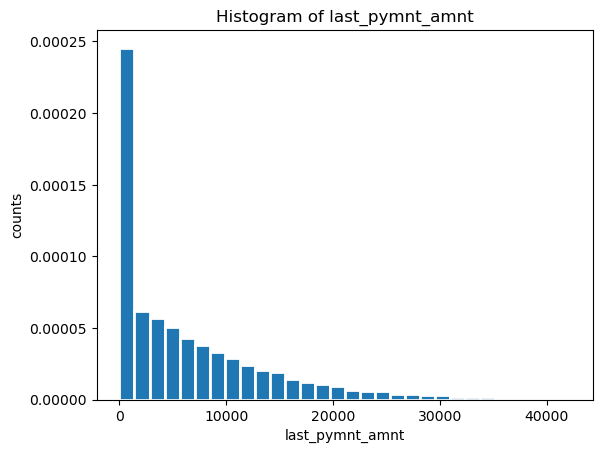

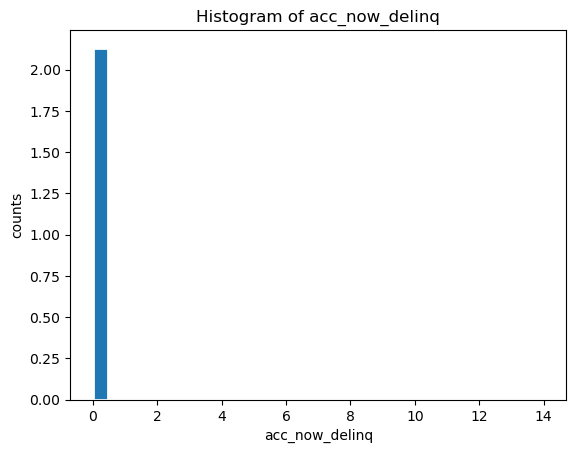

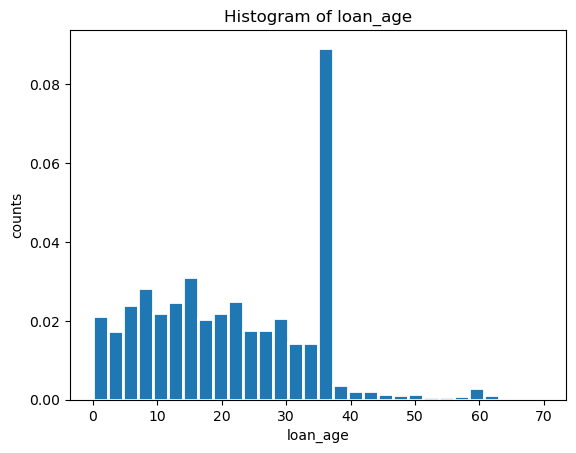

In [75]:
# check distribution for each variable
for cols in df_PaidOut.columns:
   fig, ax = plt.subplots()
   ax.hist(df_PaidOut[cols], bins=30, density=True, edgecolor='white', linewidth=2)
   plt.xlabel(cols)
   plt.ylabel('counts')
   ax.set_title(f'Histogram of {cols}')

In [76]:
# check correlation of numeric features with the target variable
df_PaidOut.corr(numeric_only=True)['loan_age']

loan_amnt          0.018516
funded_amnt        0.017505
funded_amnt_inv    0.016486
int_rate          -0.060956
installment        0.004726
annual_inc        -0.026590
open_acc          -0.020436
pub_rec           -0.027940
revol_bal          0.036833
total_acc         -0.044355
total_pymnt        0.141665
total_pymnt_inv    0.140411
last_pymnt_amnt   -0.506512
acc_now_delinq     0.004758
loan_age           1.000000
Name: loan_age, dtype: float64

In [77]:
# check correlation between features
df_PaidOut.corr(numeric_only=True)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,acc_now_delinq,loan_age
loan_amnt,1.000000,0.999553,0.998668,0.115772,0.955894,0.311790,0.185500,-0.072386,0.322608,0.206191,0.959579,0.958876,0.606558,0.000709,0.018516
funded_amnt,0.999553,1.000000,0.999198,0.115853,0.956559,0.311694,0.185806,-0.072131,0.322564,0.206140,0.959849,0.959233,0.607036,0.000773,0.017505
funded_amnt_inv,0.998668,0.999198,1.000000,0.116014,0.955680,0.311412,0.186198,-0.071592,0.322273,0.206262,0.958944,0.959920,0.607241,0.000879,0.016486
int_rate,0.115772,0.115853,0.116014,1.000000,0.128485,-0.069274,-0.016198,0.056404,-0.025465,-0.047502,0.176620,0.176689,0.202502,0.018707,-0.060956
installment,0.955894,0.956559,0.955680,0.128485,1.000000,0.302893,0.177459,-0.060875,0.312491,0.185260,0.912264,0.911596,0.528006,0.003491,0.004726
annual_inc,0.311790,0.311694,0.311412,-0.069274,0.302893,1.000000,0.134507,-0.006658,0.289674,0.175461,0.288991,0.288776,0.188969,0.012841,-0.026590
open_acc,0.185500,0.185806,0.186198,-0.016198,0.177459,0.134507,1.000000,-0.023900,0.221369,0.701585,0.175744,0.176188,0.124578,0.020735,-0.020436
pub_rec,-0.072386,-0.072131,-0.071592,0.056404,-0.060875,-0.006658,-0.023900,1.000000,-0.092702,0.002794,-0.067818,-0.067291,-0.025519,-0.001189,-0.027940
revol_bal,0.322608,0.322564,0.322273,-0.025465,0.312491,0.289674,0.221369,-0.092702,1.000000,0.188937,0.311986,0.311755,0.167248,0.001712,0.036833
total_acc,0.206191,0.206140,0.206262,-0.047502,0.185260,0.175461,0.701585,0.002794,0.188937,1.000000,0.198555,0.198723,0.159130,0.027488,-0.044355


Some of the features are highly correlated ith one another, hence, we will be dropping them

In [78]:
# define columns to drop 
col_drop = ['loan_amnt', 'funded_amnt_inv', 'pymnt_plan', 'pub_rec',
       'revol_bal', 'total_acc', 'total_pymnt_inv', 'acc_now_delinq', 'grade', 'sub_grade', 'verification_status']

In [79]:
# drop columns
df_PaidOut.drop(columns=col_drop, inplace=True)

C:\Users\Ikemma\AppData\Local\Temp\ipykernel_34400\2329853694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PaidOut.drop(columns=col_drop, inplace=True)


In [80]:
# view data
df_PaidOut.head()

,funded_amnt,int_rate,installment,home_ownership,annual_inc,purpose,open_acc,total_pymnt,last_pymnt_amnt,loan_age
100,30000,22.35,1151.16,MORTGAGE,100000.0,debt_consolidation,11.0,30026.442500,30082.32,1.018397
152,40000,16.14,975.71,MORTGAGE,45000.0,credit_card,18.0,40856.678960,40910.48,2.036794
170,20000,7.56,622.68,MORTGAGE,100000.0,credit_card,9.0,20215.792430,20228.39,2.036794
186,4500,11.31,147.99,RENT,38500.0,credit_card,12.0,4549.217149,4553.46,2.036794
215,8425,27.27,345.18,MORTGAGE,450000.0,credit_card,21.0,8735.148975,8754.30,2.036794


<Axes: >

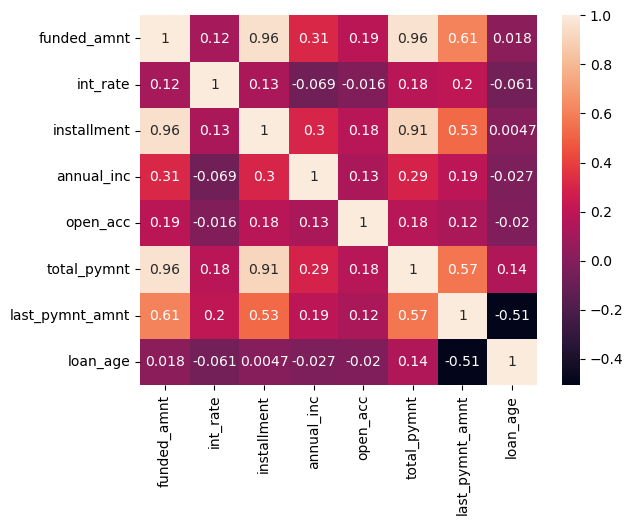

In [81]:
# plot the heatmap
c = df_PaidOut.corr(numeric_only=True)
sns.heatmap(c, annot=True)

lets check relationship with categorical variables and the target variable

In [82]:
# get dummies for all categorical variable
df_purpose = pd.get_dummies(df_PaidOut['purpose'], drop_first=True).astype(int)
df_loan_age = df_PaidOut['loan_age']
df_pur_age = pd.concat([df_loan_age, df_purpose], axis=1)
df_ownership = pd.get_dummies(df_PaidOut['home_ownership'], drop_first=True).astype(int)
df_owner_age = pd.concat([df_loan_age, df_ownership], axis=1)

In [83]:
df_pur_age.corr()['loan_age'], df_owner_age.corr()['loan_age']

(loan_age              1.000000
 credit_card           0.054715
 debt_consolidation   -0.003597
 educational           0.008170
 home_improvement     -0.027802
 house                -0.029518
 major_purchase       -0.013655
 medical              -0.015915
 moving               -0.011810
 other                -0.033413
 renewable_energy     -0.001871
 small_business        0.011032
 vacation             -0.016093
 wedding               0.023749
 Name: loan_age, dtype: float64,
 loan_age    1.000000
 MORTGAGE   -0.018973
 NONE        0.003008
 OTHER       0.006521
 OWN        -0.021467
 RENT        0.033287
 Name: loan_age, dtype: float64)

There is little to no correlation, however, we won't be dropping these variables

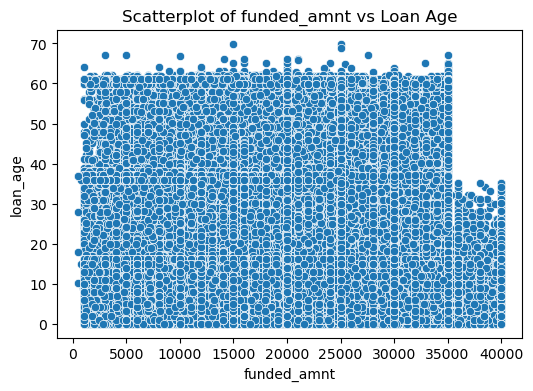

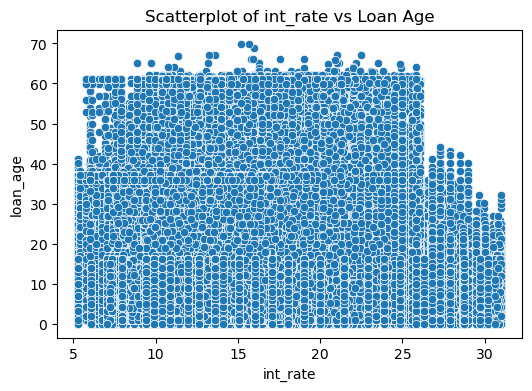

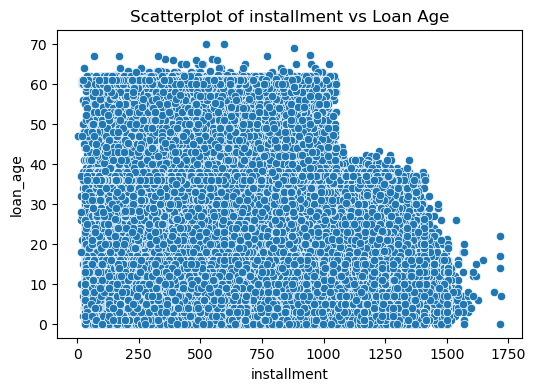

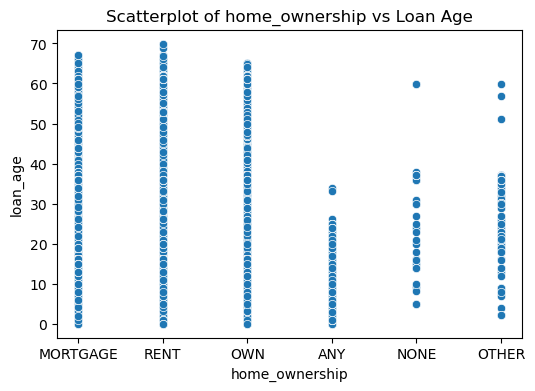

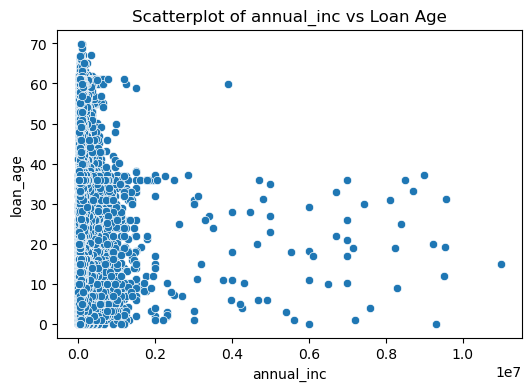

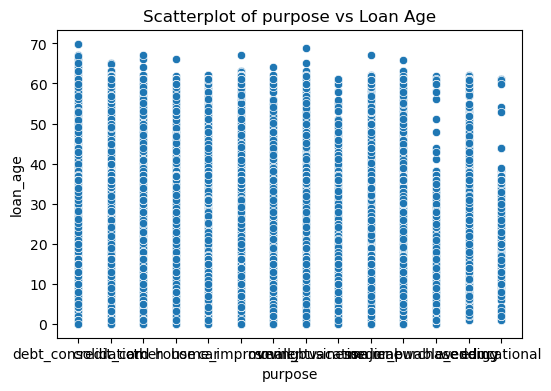

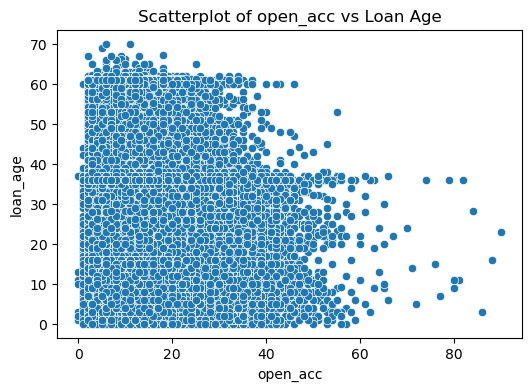

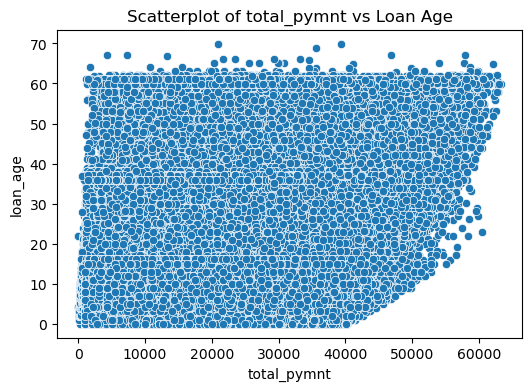

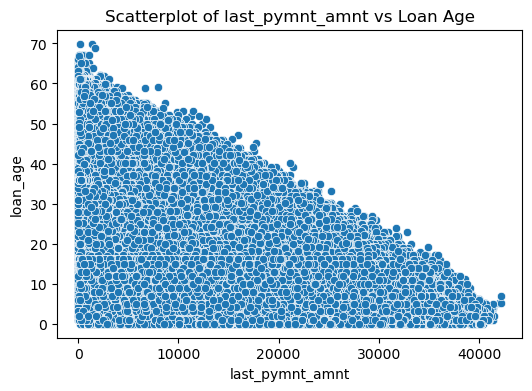

In [84]:
# using scatterplot to check relationship
for col in df_PaidOut.columns:
    if col != 'loan_age':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df_PaidOut, x=col, y='loan_age')
        plt.title(f'Scatterplot of {col} vs Loan Age')
        plt.show()


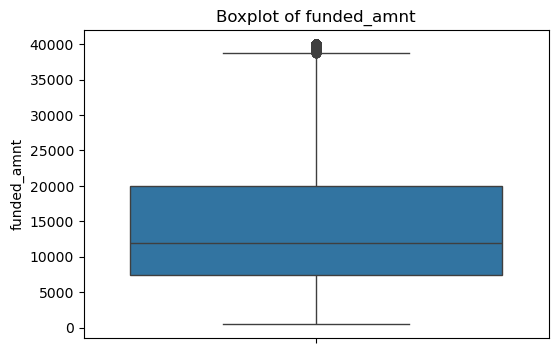

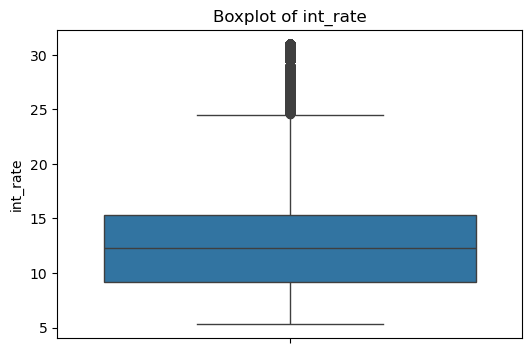

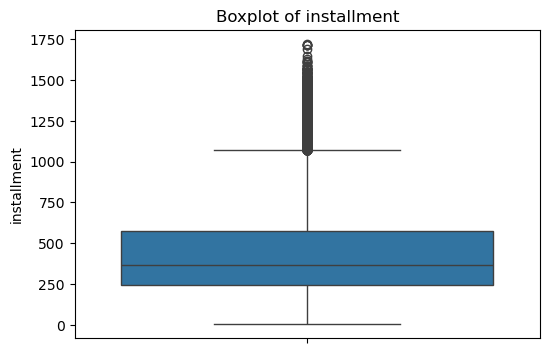

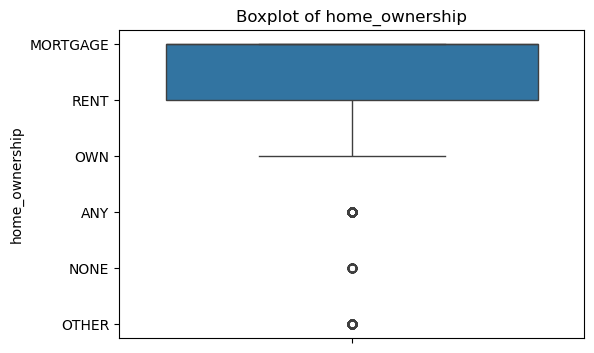

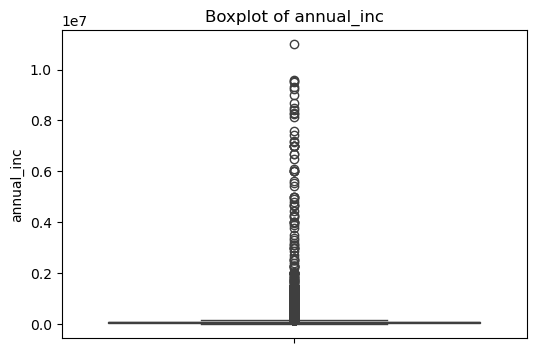

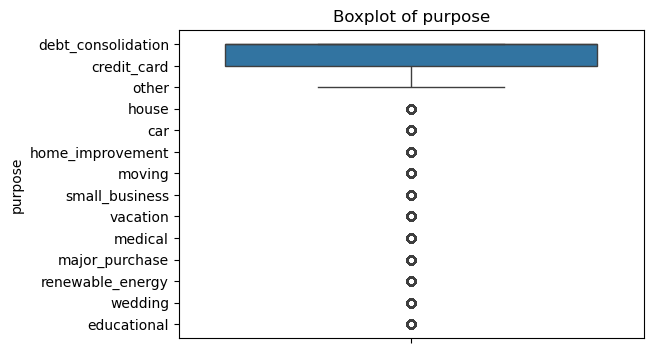

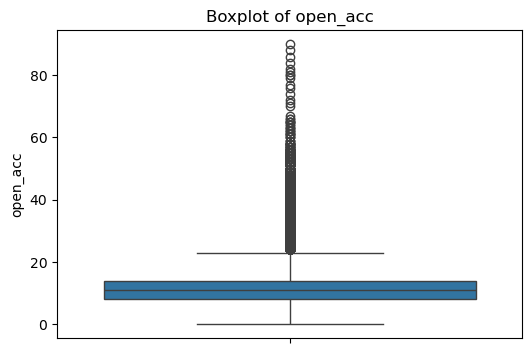

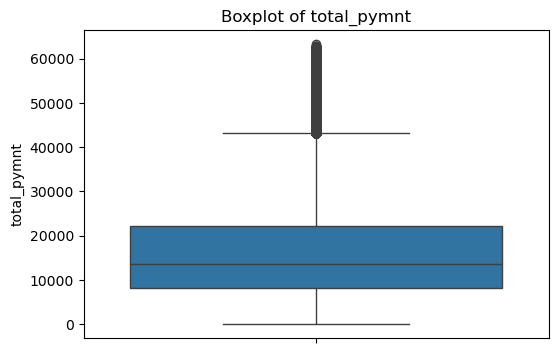

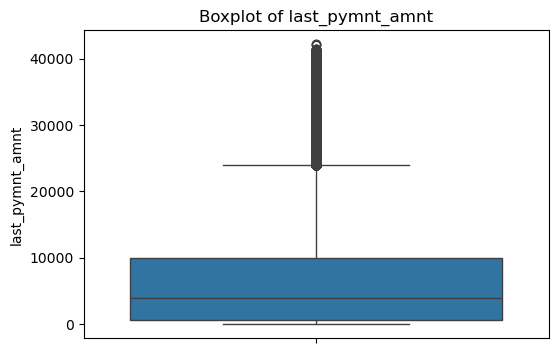

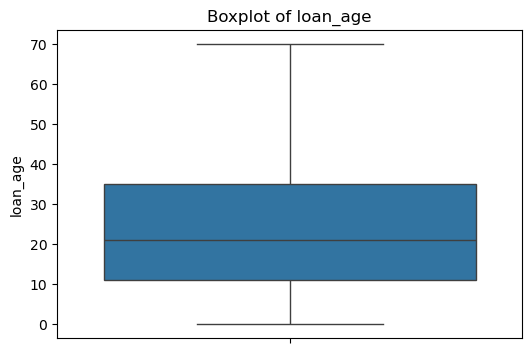

In [85]:
# using boxplot to check for outliers
for col in df_PaidOut.columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(data=df_PaidOut, y=col)  
    plt.title(f'Boxplot of {col}')
    plt.show()


There are some indicators of outliers

In [86]:
# Define a function to detect outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers

# Detect outliers for all numerical columns
outlier_dict = {}
for col in df_PaidOut.select_dtypes(include=['number']).columns:  # Only numeric columns
    outliers = detect_outliers_iqr(df_PaidOut, col)
    if not outliers.empty:
        outlier_dict[col] = outliers

# Display the outliers
outlier_dict


{'funded_amnt':          funded_amnt  int_rate  installment home_ownership  annual_inc  \
 152            40000     16.14       975.71       MORTGAGE     45000.0   
 3397           40000     11.80       885.75       MORTGAGE     75000.0   
 4114           40000      8.19       814.70       MORTGAGE    130000.0   
 4554           40000      8.81      1268.46       MORTGAGE    160000.0   
 4949           40000     16.14       975.71           RENT     60500.0   
 ...              ...       ...          ...            ...         ...   
 2259624        40000      9.44      1280.20       MORTGAGE    400000.0   
 2259748        40000      9.44       838.91       MORTGAGE    120000.0   
 2259872        40000     12.62       902.37       MORTGAGE    128500.0   
 2260081        40000      7.97      1252.91            OWN     80000.0   
 2260187        40000     10.42      1298.59           RENT     56000.0   
 
                     purpose  open_acc   total_pymnt  last_pymnt_amnt  \
 152      

In [87]:
import pandas as pd

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_cleaned

# Remove outliers from all numerical columns
df_cleaned = df_PaidOut.copy()  # Make a copy to avoid modifying the original data
for col in df_cleaned.select_dtypes(include=['number']).columns:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

# Display the cleaned DataFrame
#df_cleaned


In [88]:
df_cleaned = df_cleaned.reset_index(drop=True)

In [89]:
# save for pipeline
df_cleaned.to_csv('data_pipeline.csv')

In [90]:
# import the neccessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [91]:
# Define the categorical columns:
categorical_cols = ['home_ownership', 'purpose']

# Create OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap

# Fit and transform
encoded_array = encoder.fit_transform(df_cleaned[categorical_cols])

# Get new column names
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# Create DataFrame from encoded array
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)

# Combine with original DataFrame (excluding the original categorical columns)
df_encoded = pd.concat([df_cleaned.drop(columns=categorical_cols), encoded_df], axis=1)

# Final DataFrame
df_encoded


,funded_amnt,int_rate,installment,annual_inc,open_acc,total_pymnt,last_pymnt_amnt,loan_age,home_ownership_MORTGAGE,home_ownership_NONE,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,20000,7.56,622.68,100000.0,9.0,20215.792430,20228.39,2.036794,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4500,11.31,147.99,38500.0,12.0,4549.217149,4553.46,2.036794,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20000,17.97,507.55,57000.0,10.0,20013.577333,20043.53,1.018397,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6600,11.31,217.05,45000.0,6.0,6622.809000,6629.03,1.018397,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2500,13.56,84.92,42000.0,3.0,2501.285667,2504.11,1.018397,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894739,7000,9.93,225.65,92000.0,19.0,7735.438628,4580.20,15.013141,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
894740,21000,17.09,749.65,77000.0,18.0,9762.990000,749.65,13.009198,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
894741,10000,9.44,320.05,103510.0,13.0,10888.755458,7061.27,13.009198,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
894742,16000,18.06,406.82,50000.0,6.0,19082.584959,14240.87,13.009198,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
# check shape 
df_encoded.shape

(894744, 26)

In [93]:
# save to csv
df_encoded.to_csv('data_modelling.csv')